In [15]:
import pandas as pd

df = pd.read_csv("soil_moisture.csv - Sheet1.csv")   # put exact name here
print(df.head())



   temperature  humidity  soil_moisture
0           25        60             45
1           28        65             50
2           30        70             55
3           32        72             58
4           27        68             52


In [16]:
print(df)

   temperature  humidity  soil_moisture
0           25        60             45
1           28        65             50
2           30        70             55
3           32        72             58
4           27        68             52
5           26        64             48
6           29        66             53
7           31        71             57
8           33        75             60
9           24        59             44


In [17]:
print(df.shape)

(10, 3)


Mean Squared Error: 0.7116008943384057
R² Score: 0.9715359642264638
Intercept: -10.587991266375546
Coefficients: [0.90524017 0.55458515]


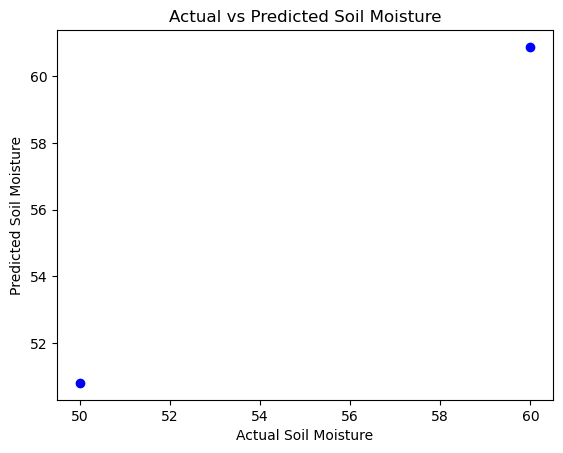

In [20]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Define Features (X) and Target (y)
X = df[['temperature', 'humidity']]   # independent variables
y = df['soil_moisture']               # dependent variable

# Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Step 7: Visualization (optional)
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Soil Moisture")
plt.ylabel("Predicted Soil Moisture")
plt.title("Actual vs Predicted Soil Moisture")
plt.show()

In [21]:
# Print regression equation
coef_temp, coef_hum = model.coef_
intercept = model.intercept_

print(f"Regression Equation:")
print(f"soil_moisture = {intercept:.2f} + ({coef_temp:.2f} * temperature) + ({coef_hum:.2f} * humidity)")

Regression Equation:
soil_moisture = -10.59 + (0.91 * temperature) + (0.55 * humidity)


In [22]:
# Example: predict soil moisture for new values
new_data = pd.DataFrame({
    'temperature': [30, 28, 25],
    'humidity': [70, 65, 60]
})

predictions = model.predict(new_data)
print("Predicted Soil Moisture Values:")
print(predictions)

Predicted Soil Moisture Values:
[55.39017467 50.80676856 45.31812227]


In [2]:
pip install numpy pandas matplotlib seaborn scikit-learn xgboost


  Using cached xgboost-3.0.4-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
    --------------------------------------- 1.0/56.8 MB 3.3 MB/s eta 0:00:18
   - -------------------------------------- 2.4/56.8 MB 4.6 MB/s eta 0:00:12
   -- ------------------------------------- 3.9/56.8 MB 5.4 MB/s eta 0:00:10
   --- ------------------------------------ 5.2/56.8 MB 5.7 MB/s eta 0:00:10
   ---- ----------------------------------- 6.6/56.8 MB 5.9 MB/s eta 0:00:09
   ----- ---------------------------------- 7.9/56.8 MB 6.0 MB/s eta 0:00:09
   ------ --------------------------------- 9.2/56.8 MB 6.0 MB/s eta 0:00:08
   ------- -------------------------------- 10.5/56.8 MB 6.0 MB/s eta 0:00:08
   -------- ------------------------------- 11.5/56.8 MB 6.2 MB/s eta 0:00:08
   --------- ------------

In [3]:
!pip install numpy pandas matplotlib seaborn scikit-learn xgboost


Dataset sample:
    Temperature   Humidity   Rainfall  SoilMoisture
0    24.363503  27.218671  35.361932     61.752665
1    38.767858  83.178703   7.626952     65.380641
2    33.299849  55.367666  28.814418     62.151949
3    29.966462  77.852023  30.335752     76.607875
4    18.900466  42.403472  21.206534     59.686634

📊 Model Comparison:
                Model     R²   RMSE    MAE
0  Linear Regression  0.952  2.115  1.658
1      Random Forest  0.928  2.606  2.017
2            XGBoost  0.921  2.719  2.149


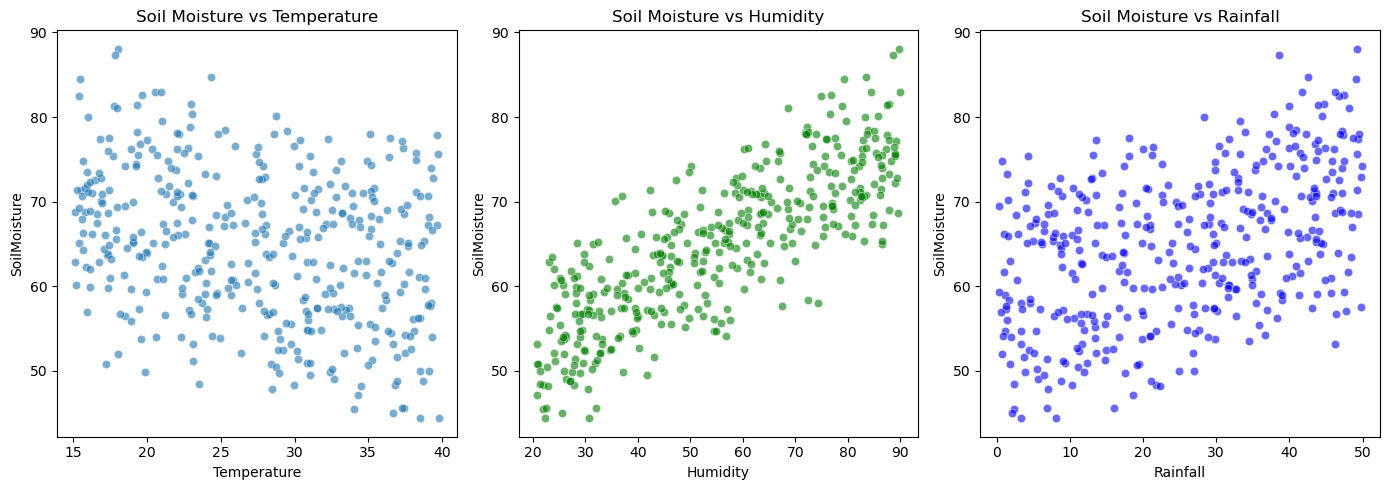

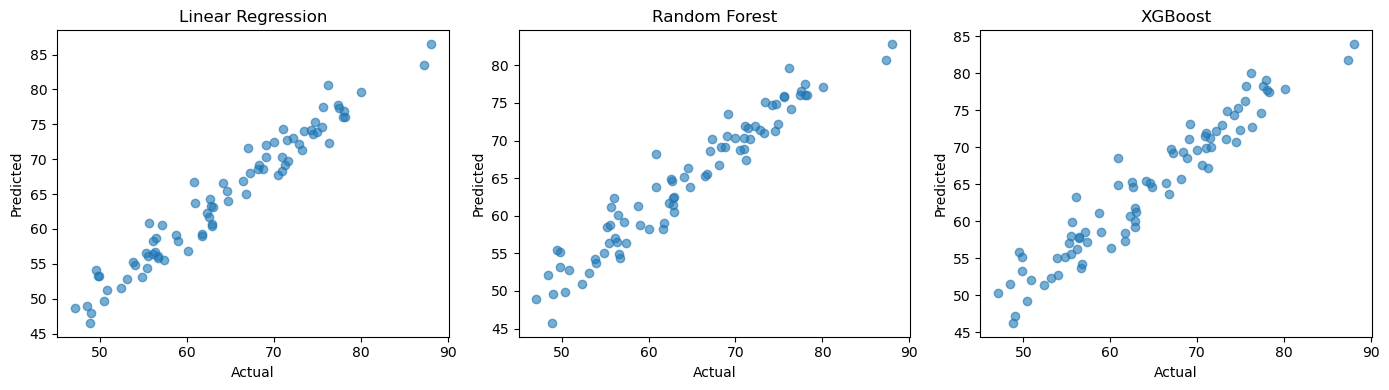


✅ Best performing model: Linear Regression
💧 Estimated water-saving accuracy: 0.0%


In [5]:
# 🌱 Phase 2: Soil Moisture Prediction (Lifecycle-Aligned)

# --- Step 1: Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# --- Step 2: Simulate Dataset (or replace with real CSV) ---
np.random.seed(42)
n = 400

temperature = np.random.uniform(15, 40, n)   # °C
humidity = np.random.uniform(20, 90, n)      # %
rainfall = np.random.uniform(0, 50, n)       # mm (new feature!)

# Soil moisture depends on temp, humidity, rainfall
soil_moisture = (
    50 - 0.4*temperature + 0.35*humidity + 0.25*rainfall 
    + np.random.normal(0, 2, n)
)

df = pd.DataFrame({
    "Temperature": temperature,
    "Humidity": humidity,
    "Rainfall": rainfall,
    "SoilMoisture": soil_moisture
})

print("Dataset sample:\n", df.head())

# --- Step 3: Preprocessing ---
X = df[["Temperature", "Humidity", "Rainfall"]]
y = df["SoilMoisture"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# --- Step 4: Train Models ---
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=150, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=150, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    results.append([name, round(r2,3), round(rmse,3), round(mae,3)])

results_df = pd.DataFrame(results, columns=["Model", "R²", "RMSE", "MAE"])
print("\n📊 Model Comparison:\n", results_df)

# --- Step 5: Visualizations ---
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.scatterplot(x="Temperature", y="SoilMoisture", data=df, alpha=0.6)
plt.title("Soil Moisture vs Temperature")

plt.subplot(1,3,2)
sns.scatterplot(x="Humidity", y="SoilMoisture", data=df, alpha=0.6, color="green")
plt.title("Soil Moisture vs Humidity")

plt.subplot(1,3,3)
sns.scatterplot(x="Rainfall", y="SoilMoisture", data=df, alpha=0.6, color="blue")
plt.title("Soil Moisture vs Rainfall")
plt.tight_layout()
plt.show()

# Prediction vs Actual for each model
plt.figure(figsize=(14,4))
for i, (name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test)
    plt.subplot(1,3,i)
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{name}")
plt.tight_layout()
plt.show()

# --- Step 6: Mini Impact Assessment ---
best_model = results_df.loc[results_df["R²"].idxmax(), "Model"]
print(f"\n✅ Best performing model: {best_model}")

# Example impact: if soil moisture < 30 → irrigation needed
threshold = 30
y_pred_best = models[best_model].predict(X_test)
water_saving = np.sum((y_test < threshold) & (y_pred_best < threshold)) / len(y_test) * 100

print(f"💧 Estimated water-saving accuracy: {round(water_saving,2)}%")


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset (replace with your file path if not already loaded)
# df = pd.read_csv("your_dataset.csv")

# Features (X) and Target (y)
X = df.drop("SoilMoisture", axis=1)   # Temperature, Humidity, Rainfall
y = df["SoilMoisture"]                # Target column

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# 2. Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# 3. XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n📊 {model_name} Performance:")
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("R² Score:", r2_score(y_true, y_pred))

# Evaluate all models
evaluate_model(y_test, lr_preds, "Linear Regression")
evaluate_model(y_test, rf_preds, "Random Forest")
evaluate_model(y_test, xgb_preds, "XGBoost")



📊 Linear Regression Performance:
MSE: 4.472014753032584
R² Score: 0.9524977018988752

📊 Random Forest Performance:
MSE: 6.902996950112817
R² Score: 0.9266755060025123

📊 XGBoost Performance:
MSE: 7.390336806844789
R² Score: 0.9214989213019937


In [9]:
import joblib

# Save the trained Linear Regression model
joblib.dump(lr_model, "linear_regression_model.pkl")

print("Model saved successfully as linear_regression_model.pkl")


Model saved successfully as linear_regression_model.pkl


In [10]:
# Load the saved model
loaded_model = joblib.load("linear_regression_model.pkl")

# Use it for predictions
predictions = loaded_model.predict(X)


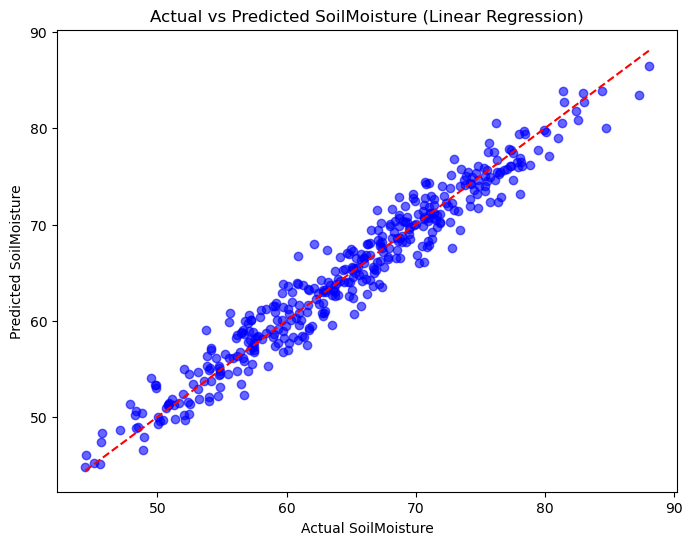

In [11]:
import matplotlib.pyplot as plt

# Predict using the Linear Regression model
y_pred = lr_model.predict(X)

plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, color="blue", alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--")
plt.xlabel("Actual SoilMoisture")
plt.ylabel("Predicted SoilMoisture")
plt.title("Actual vs Predicted SoilMoisture (Linear Regression)")
plt.show()
